In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
json_path = '/content/user-wallet-transactions.json'

with open(json_path, 'r') as f:
    data = json.load(f)

# Converting JSON to DataFrame
df = pd.DataFrame(data)

In [5]:
df.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


# Cleaning  & Preprocessing the Data

In [9]:
df['amount'] = df['actionData'].apply(lambda x: x.get('amount') if isinstance(x, dict) else None) # Extract 'amount' from the 'actionData' column

df['amount'] = pd.to_numeric(df['amount'], errors='coerce') # Convert amount value to float

df.dropna(subset=['amount'], inplace=True) # Drop rows with missing or invalid amounts

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s') # Convert timestamp to readable datetime

In [10]:
df.head() # review the data

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt,amount
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'},2.000000e+09
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'},1.450000e+20
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'},1.000000e+15
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'},4.000000e+15
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'},5.015480e+05


# Defining the Wallet Score Function

In [16]:
def score_wallet(wallet_df):
    wallet_group = wallet_df.groupby('userWallet')
    features = wallet_group['action'].value_counts().unstack(fill_value=0)

    # General behavior
    features['total_txns'] = wallet_group.size()
    features['unique_assets'] = wallet_group['actionData'].apply(lambda x: x.get('asset') if isinstance(x, dict) else None).nunique()
    features['avg_amount'] = wallet_group['amount'].mean()
    features['max_amount'] = wallet_group['amount'].max()

    # Behavioral Ratios - safe division
    features['repay_to_borrow'] = features.get('repay', 0) / (features.get('borrow', 1))
    features['redeem_to_deposit'] = features.get('redeemunderlying', 0) / (features.get('deposit', 1))
    features['liquidation_rate'] = features.get('liquidationcall', 0) / features['total_txns']

    # Replace NaNs and infs
    features.replace([np.inf, -np.inf], 0, inplace=True)
    features.fillna(0, inplace=True)

    # Scaling scores to range from 0 to 1000
    scaler = MinMaxScaler(feature_range=(0, 1000))
    scaled = scaler.fit_transform(features)

    features['credit_score'] = scaled.mean(axis=1).round().astype(int)  # Final credit score = mean of all scaled features

    return features

# Computing Credit Scores

In [17]:
scored_df = score_wallet(df)

scored_df[['credit_score']].head() # review top rows


action,credit_score
userWallet,
0x00000000001accfa9cef68cf5371a23025b6d4b6,0
0x000000000051d07a4fb3bd10121a343d85818da6,0
0x000000000096026fb41fc39f9875d164bd82e2dc,0
0x0000000000e189dd664b9ab08a33c4839953852c,0
0x0000000002032370b971dabd36d72f3e5a7bf1ee,53


# Visualizing Credit Score Distribution

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


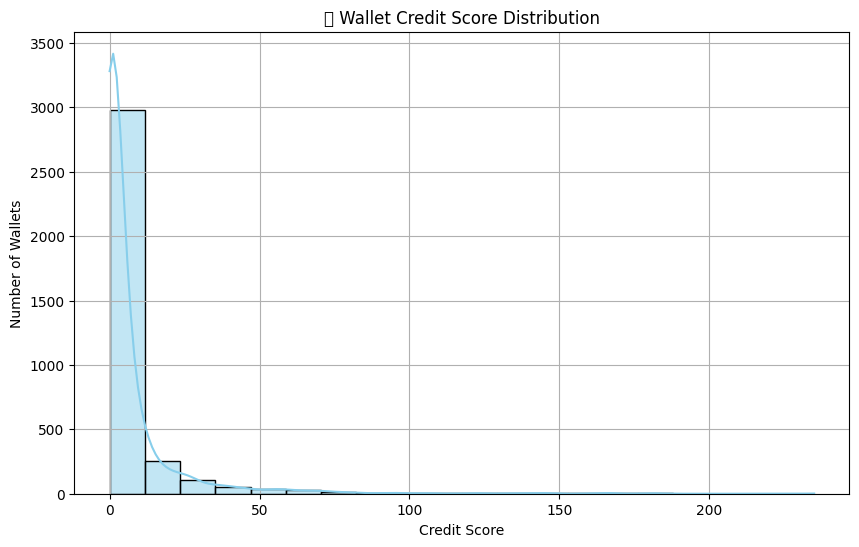

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(scored_df['credit_score'], bins=20, kde=True, color='skyblue')
plt.title('🧾 Wallet Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Number of Wallets')
plt.grid(True)
plt.show()


# Highlighting the Top & Bottom Wallets

In [20]:
print(" Bottom 10 Risky Wallets")
print(scored_df.sort_values('credit_score').head(10)[['credit_score']])

print("\n Top 10 Trusted Wallets")
print(scored_df.sort_values('credit_score', ascending=False).head(10)[['credit_score']])


 Bottom 10 Risky Wallets
action                                      credit_score
userWallet                                              
0x060cfcf2bd89aadaedd2f2b4760466ec1c57377c             0
0x060bb7f9d479437099cd521df4f5051a247ab3ae             0
0x060aa29adb1e32a4d5471461ea5e9815028a82c5             0
0x06098dc30b09865b5eaaf0a40dd373c0fbbf2741             0
0x00099b1263c22ae2ce0a52624cef2a012e751970             0
0x00080000158a9930aeb508823103b0a977161c47             0
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54             0
0x000660cad76200a2e326f53e033919905e6c50f5             0
0x0462d63693c30e73e3646ade6f0aa44ea307832a             0
0x04621637c3a72db27d6f1fc1352480fd4d1e7b06             0

 Top 10 Trusted Wallets
action                                      credit_score
userWallet                                              
0x04d9f6ecd792e48a09fa5dc2138baed8e628a7e5           235
0x02a16f8df2b11b3a0c9f47cc5d705830792e3e6f           184
0x047a96ef72d7ee6a3f193bdb92e998fb3002

# Exporting Credit Scores to CSV

In [23]:
import os

output_path = '/content/drive/MyDrive/Assignment/wallet_scores.csv'
output_dir = os.path.dirname(output_path)

# Create the directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

scored_df[['credit_score']].reset_index().to_csv(output_path, index=False)

print(f"Scores saved to: {output_path}")

Scores saved to: /content/drive/MyDrive/Assignment/wallet_scores.csv
